In [1]:
import sys
sys.path.append('pyFiles')
from MultiAgentEnv3 import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt

## Q value

In [2]:
def q_val(env,state,action,s_values):
    env.reset()
    env.state = state
    reward = 0
    observations, rewards, terminations, truncations, infos = env.step(action)
    s_val_index = state_index_calculator(env,observations)
    for agent in env.possible_police:
        reward = rewards[agent]
    return reward + 0.9*s_values[s_val_index]

## State Value Function , Max Action Function , State Index Calculator, State Calculator


In [3]:
def s_val(env,state,s_values):
    for thief in env.possible_thieves:
        for police in env.possible_police:
            if state[thief] == state[police]:
                return 0
    q_values = []
    for j in range(4):
        for k in range(4):
            for l in range(4):
                temp_state = state.copy()
                action = {env.possible_agents[0]:0,env.possible_agents[1]:j,env.possible_agents[2]:k,env.possible_agents[3]:l}
                q_values.append(q_val(env,temp_state,action,s_values))
    return max(q_values)

def max_act(env,state,s_values):
#     action = {env.possible_agents[0]:0,env.possible_agents[1]:0,env.possible_agents[2]:0,env.possible_agents[3]:0}
#     for thief in env.possible_thieves:
#         for police in env.possible_police:
#             if state[thief] == state[police]:
#                 return action
    q_values = []
    actions = []
    temp_state = state.copy()
    for k in range(4):
        for l in range(4):
            temp_state = state.copy()
            action = {env.possible_agents[0]:0,env.possible_agents[1]:1,env.possible_agents[2]:k,env.possible_agents[3]:l}
            q_values.append(q_val(env,temp_state,action,s_values))
            actions.append(action)
    max_val = max(q_values)
    max_val_index = q_values.index(max_val)
    env.state = state
    return actions[max_val_index]

def state_index_calculator(env,state):
    multiplier = 1
    state_index = 0
    for agent in env.possible_agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= 13
    return state_index

def state_calculator(env,state_index):
    temp_state = {}
    for n in range (4):
        temp_state[env.possible_agents[n]] = env.node_dict[(state_index // (13**(3-n)))]
        state_index = state_index % (13**(3-n))
    return temp_state

## Single Sweep

In [4]:
def single_sweep(env,s_values):
    temp_value_func = [0] * env.g_no_node ** 4
    for i in range(env.g_no_node**4):
        state= state_calculator(env,i)
        temp_value_func[i] = s_val(env,state,s_values)
    return temp_value_func

## Until Convergence

In [5]:
env = CustomEnvironment()
s_values = 13**4
print(env.possible_agents)

['thief_0', 'thief_1', 'police_0', 'police_1']


In [ ]:
state = env.reset()
s_values = [0] * env.g_no_node ** 4
delta = 0.1
diff = 1000
count = 0
while (diff > delta):
    state = env.reset()
    temp_value_func = [v for v in s_values]
    s_values = single_sweep(env,s_values)
    temp_diff = 0;
    for index in range(len(s_values)):
        temp_diff += abs(temp_value_func[index]-s_values[index])
    diff = temp_diff
    plt.plot(range(13**4),s_values)
    plt.show()
# print(s_values)
s_values2 = [0] * env.g_no_node ** 4

## Visualization of convergence

<Axes: >

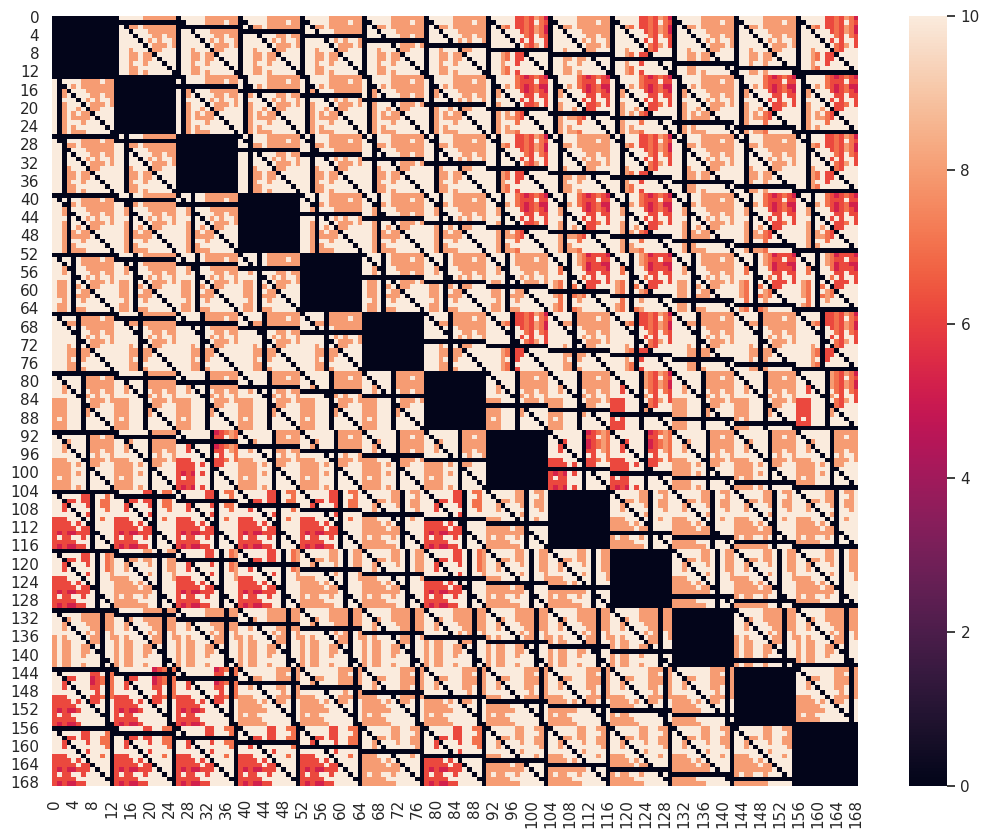

In [9]:
import seaborn as sns
import numpy as np
x = np.zeros((169,169))

for n in range(len(s_values)):
    i = n // 169
    j = n % 169
    x[i,j] = s_values[n]
    
# sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(x)

## Implementataion of Policy

In [ ]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        env.temp_render(episode)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))